In [34]:
import json

import numpy as np
import matplotlib.pyplot as plt

import string

In [2]:
with open("results-updated.json") as fp:
#     loaded_json = json.load(fp)
    results = json.load(fp)

# results = {}
# for key, item in loaded_json.items():
#     item2 = item.copy()
#     server_data = item2.pop("KMeans Server  ")
#     item2["KMeans Server One-Shot"] = server_data
#     results[key] = item2

# for key, item in results.items():
#     print(item.keys())
    
    

In [20]:
labels = {
    'KMeans Distributed Decentralized (Gossip)  ': 'KMeans Distributed Decentralized (Gossip)',
    'KMeans Distributed Centralized  ': 'KMeans Distributed Centralized',
    'KMeans Server  ': 'KMeans Server One-Shot',
    'KMeans Server Keep  ': 'KMeans Server Keep',
    'Traditional K-Means': 'Traditional K-Means'
}

# Static and Uniform

In [21]:
# results["Static and Uniform"]

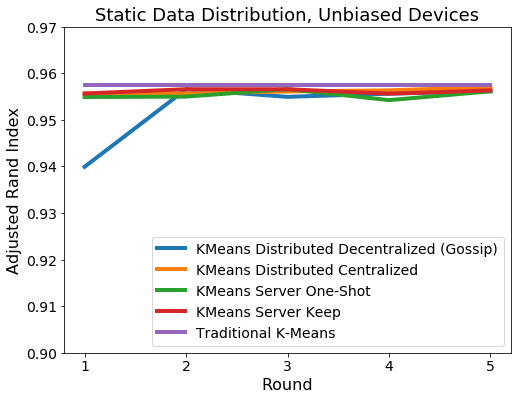

In [23]:
plt.figure(figsize=(8, 6))
for label, data in results["Static and Uniform"].items():
    plt.plot(range(1, len(data["rounds"]) + 1), data["rounds"], label=labels[label], linewidth=4)
plt.title("Static Data Distribution, Unbiased Devices", fontsize=18)
plt.xlabel("Round", fontsize=16)
plt.xticks(range(1, 6), fontsize=14)
plt.ylabel("Adjusted Rand Index", fontsize=16)
# plt.ylim(0.8, 0.975)
plt.yticks(np.arange(0.9, 0.971, 0.01), fontsize=14)
plt.legend(loc="lower right", prop={'size': 14})
plt.savefig("Figures/fig2.png", dpi=300)
plt.show()

In [6]:
# plt.figure(figsize=(8, 6))
# for label, data in results["Static and Uniform"].items():
#     plt.plot(range(1, len(data["rounds"]) + 1), data["rounds"], label=label, linewidth=3)
# plt.title("Static Data Distribution, IID-Data", fontsize=18)
# plt.xlabel("Round", fontsize=16)
# plt.xticks(range(1, 6), fontsize=14)
# plt.ylabel("Adjusted Rand Index", fontsize=16)
# plt.ylim(0.952, 0.958)
# plt.yticks(np.arange(0.952, 0.958, 0.002), fontsize=14)
# plt.legend(loc="lower right", prop={'size': 14})
# plt.show()

# IID-ness

In [7]:
iid_keys = ["25% IID", "50% IID", "75% IID", "100% IID"]
iid_key_mapping = {
    "25% IID": "25% Bias",
    "50% IID": "50% Bias",
    "75% IID": "75% Bias",
    "100% IID": "100% Bias"
}

results["100% IID"]

{'KMeans Distributed Decentralized (Gossip)  ': {'end': 0.5580744430255336,
  'rounds': [0.28211351025263964,
   0.3110130960003598,
   0.5255749394920525,
   0.45715867131089927,
   0.5073001745500035]},
 'KMeans Distributed Centralized  ': {'end': 0.9551844082759426,
  'rounds': [0.9556321612248635,
   0.955631681269839,
   0.9565881642993276,
   0.9561090785655838,
   0.9551844082759426]},
 'KMeans Server  ': {'end': 0.9544190677001744,
  'rounds': [0.9521776490078327,
   0.9540425884221053,
   0.9552035689281436,
   0.9523554479218824,
   0.9544190677001744]},
 'KMeans Server Keep  ': {'end': 0.9547062012618588,
  'rounds': [0.9537393054225514,
   0.9544635415695337,
   0.9540112494384867,
   0.955403539286921,
   0.9547062012618588]},
 'Traditional K-Means': {'end': 0.9572502171727133,
  'rounds': [0.9572502171727133,
   0.9572502171727133,
   0.9572502171727133,
   0.9572502171727133,
   0.9572502171727133]}}

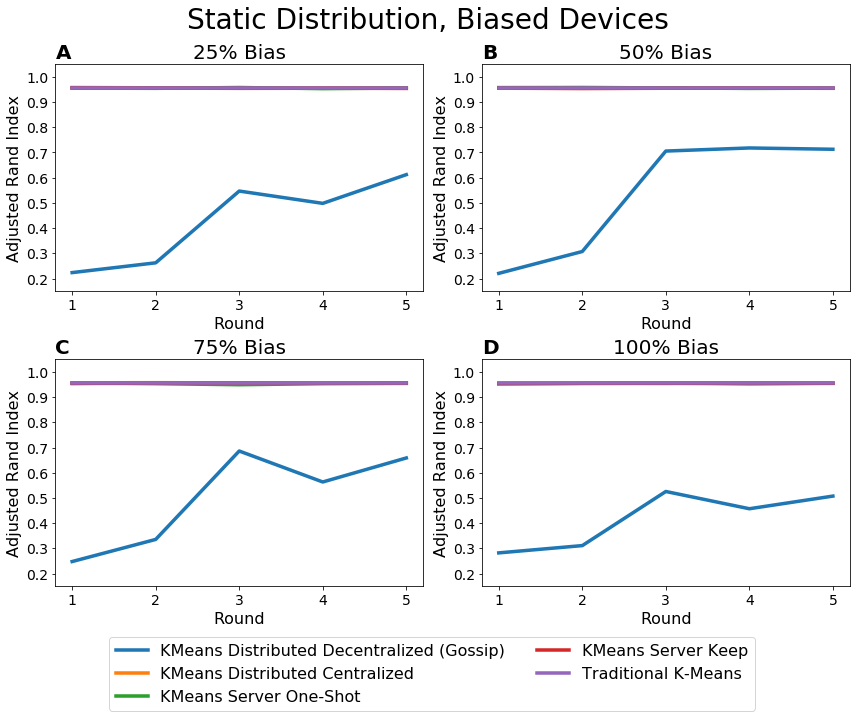

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flat
handles = [0]*5
for i, iid_key in enumerate(iid_keys):
    for j, (label, data) in enumerate(results[iid_key].items()):
        handles[j], = axes[i].plot(range(1, len(data["rounds"])+1), 
                                           data["rounds"],
                                           label=labels[label], 
                                           linewidth=3.5)
    axes[i].set_title(iid_key_mapping[iid_key], fontsize=20)
    axes[i].set_xlabel("Round", fontsize=16)
    axes[i].set_xticks(range(1, 6))
    axes[i].tick_params(axis='x', labelsize= 14)
    axes[i].set_ylim(0.15, 1.05)
    axes[i].set_ylabel("Adjusted Rand Index", fontsize=16)
    axes[i].set_yticks(np.arange(0.2, 1.1, 0.1))
    axes[i].tick_params(axis='y', labelsize= 14)
    axes[i].text(0, 1.025, string.ascii_uppercase[i], transform=axes[i].transAxes, 
                    size=20, weight='bold')


plt.tight_layout()
fig.subplots_adjust(bottom=0.175, top=0.9, hspace=0.3)
fig.suptitle("Static Distribution, Biased Devices", size=28)
fig.legend(handles=handles, loc="lower center", bbox_to_anchor=(0.5, -0.005), ncol=2, prop={'size': 16})
plt.savefig("Figures/fig3.png", dpi=300)
plt.show()

In [9]:
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# handles = [0]*5
# for i, iid_key in enumerate(iid_keys):
#     for j, (label, data) in enumerate(results[iid_key].items()):
#         handles[j], = axes[i//2][i%2].plot(range(1, len(data["rounds"])+1), 
#                                            data["rounds"],
#                                            label=label, 
#                                            linewidth=2.5)
#     axes[i//2][i%2].set_title(iid_key_mapping[iid_key], fontsize=16)
#     axes[i//2][i%2].set_xlabel("Round", fontsize=14)
#     axes[i//2][i%2].set_xticks(range(1, 6))
#     axes[i//2][i%2].tick_params(axis='x', labelsize= 12)
#     axes[i//2][i%2].set_ylabel("Adjusted Rand Index", fontsize=14)
#     axes[i//2][i%2].set_ylim(0.948, 0.96)
#     axes[i//2][i%2].set_yticks(np.arange(0.948, 0.96, 0.002))
#     axes[i//2][i%2].tick_params(axis='y', labelsize= 12)


# plt.tight_layout()
# fig.subplots_adjust(bottom=0.175, top=0.9, hspace=0.3)
# fig.suptitle("Static Distribution, Non-IID Data", size=20)
# fig.legend(handles=handles, loc="lower center", bbox_to_anchor=(0.5, -0.005), ncol=2, prop={'size': 14})
# plt.show()

# Cross Device Detection

In [10]:
# results["Cross-Device Detection"]

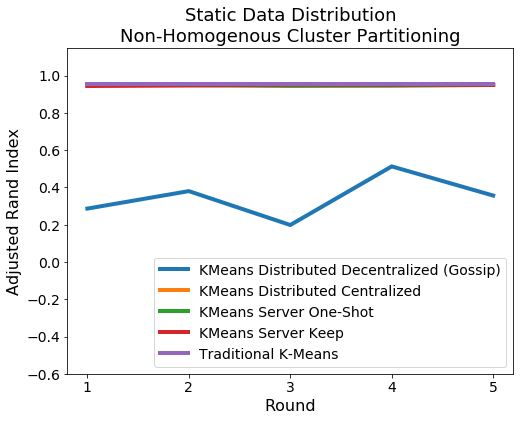

In [28]:
plt.figure(figsize=(8, 6))
for label, data in results["Cross-Device Detection"].items():
    plt.plot(range(1, len(data["rounds"]) + 1), data["rounds"], label=labels[label], linewidth=4)
plt.title("Static Data Distribution\nNon-Homogenous Cluster Partitioning", fontsize=18)
plt.xlabel("Round", fontsize=16)
plt.xticks(range(1, 6), fontsize=14)
plt.ylabel("Adjusted Rand Index", fontsize=16)
plt.ylim(-0.6, 1.15)
plt.yticks(np.arange(-0.6, 1.1, 0.2), fontsize=14)
plt.legend(loc="lower right", prop={'size': 14})
plt.savefig("Figures/fig4.png", dpi=300)
plt.show()

In [12]:
# plt.figure(figsize=(8, 6))
# for label, data in results["Cross-Device Detection"].items():
#     plt.plot(range(1, len(data["rounds"]) + 1), data["rounds"], label=label, linewidth=3)
# plt.title("Static Data Distribution\n Non-Homogeneous Cluster Partitioning", fontsize=18)
# plt.xlabel("Round", fontsize=16)
# plt.xticks(range(1, 6), fontsize=14)
# plt.ylabel("Adjusted Rand Index", fontsize=16)
# plt.ylim(0.93, 0.96)
# plt.yticks(np.arange(0.93, 0.961, 0.01), fontsize=14)
# plt.legend(loc="lower right", prop={'size': 12})
# plt.show()

# Online-ness

In [14]:
scenarios = [
             'Crowd Discover Transitioned', 
             'Crowd Replacement Transitioned', 
#              'Subset Discover Long Transitioned', 
             'Subset Discover Transitioned'
            ]

colors = ["g", "m", "C1", "b"]
dashes = [(2, 1),
          (2, 2),
          (2, 4),
          (2, 2)]

# sorted(results[scenario].keys())
# results["Subset Discover Long Transitioned"]

In [15]:
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# handles = [0]*4
# for i, scenario in enumerate(scenarios):
# #     print((results[scenario]))
#     for j, (label, data) in enumerate(sorted(results[scenario].items())):
# #         print(label)
# #         if label == "KMeans Server Keep  ":
# #             handles[j], = axes[i//2][i%2].plot(range(1, len(data["rounds"])+1), 
# #                                                data["rounds"], "p--",
# #                                                label=label, 
# #                                                linewidth=2.5)
# #         else:
# #             handles[j], = axes[i//2][i%2].plot(range(1, len(data["rounds"])+1), 
# #                                                data["rounds"],
# #                                                label=label, 
# #                                                linewidth=2.5)
# #         print(label)

#         handles[j], = axes[i//2][i%2].plot(range(1, len(data["rounds"])+1), 
#                                            data["rounds"],
#                                            linestyle="--",
#                                            color=colors[j],
#                                            dashes=dashes[j],
#                                            label=label, 
#                                            linewidth=4)
#     axes[i//2][i%2].set_title(scenario, fontsize=20)
#     axes[i//2][i%2].set_xlabel("Round", fontsize=16)
#     axes[i//2][i%2].set_xticks(range(1, len(data["rounds"])+2, 2))
#     axes[i//2][i%2].tick_params(axis='x', labelsize=14)
#     axes[i//2][i%2].set_ylabel("Adjusted Rand Index", fontsize=16)
#     axes[i//2][i%2].tick_params(axis='y', labelsize= 14)
    
#     if scenario == "Subset Discover Long Transitioned" or "Subset Discover Transitioned":
#         axes[i//2][i%2].set_xticks(range(1, len(data["rounds"])+2, 4))
#     print()
        
# plt.tight_layout()
# fig.subplots_adjust(bottom=0.135, top=0.9, hspace=0.3)
# fig.suptitle("Dynamic Data Distribution", size=28)
# fig.legend(handles=handles, loc="lower center", bbox_to_anchor=(0.5, -0.005), ncol=2, prop={'size': 16})
# plt.show()

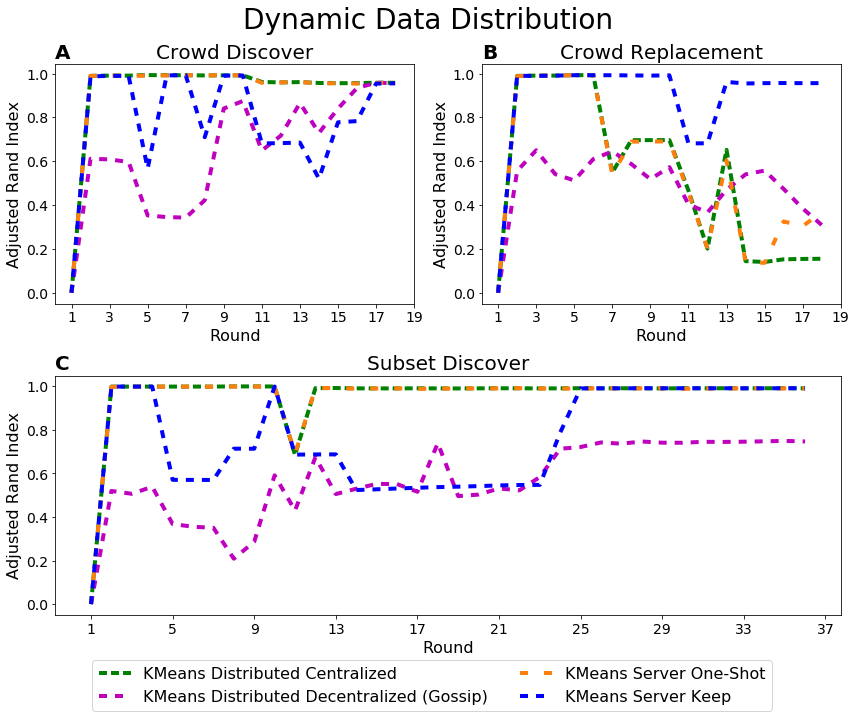

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
handles = [0]*4
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
axes = [ax1, ax2, ax3]
for i, scenario in enumerate(scenarios):
#     print((results[scenario]))
    ax = axes[i]
    for j, (label, data) in enumerate(sorted(results[scenario].items())):
        handles[j], = ax.plot(range(1, len(data["rounds"])+1), 
                              data["rounds"],
                              linestyle="--",
                              color=colors[j],
                              dashes=dashes[j],
                              label=labels[label], 
                              linewidth=4)
    ax.set_title(scenario.replace(" Transitioned", ""), fontsize=20)
    ax.set_xlabel("Round", fontsize=16)
    ax.set_xticks(range(1, len(data["rounds"])+2, 2))
    ax.tick_params(axis='x', labelsize=14)
    ax.set_ylabel("Adjusted Rand Index", fontsize=16)
    ax.tick_params(axis='y', labelsize= 14)
    
    ax.text(0, 1.025, string.ascii_uppercase[i], transform=ax.transAxes, 
            size=20, weight='bold')
    
    if scenario == "Subset Discover Transitioned":
        ax.set_xticks(range(1, len(data["rounds"])+2, 4))
    print()
        
plt.tight_layout()
fig.subplots_adjust(bottom=0.135, top=0.9, hspace=0.3)
fig.suptitle("Dynamic Data Distribution", size=28)
fig.legend(handles=handles, loc="lower center", bbox_to_anchor=(0.5, -0.005), ncol=2, prop={'size': 16})
plt.savefig("Figures/fig5.png", dpi=300)
plt.show()

In [ ]:
a = [1, 2, 3, 4]
shift(a, 2)

# Dataset

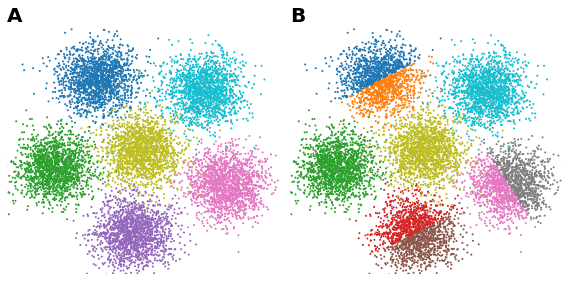

In [89]:
dataset = np.load("Data/multigroup_data.npz")["blobs_high_noise"]
labels = np.load("Data/multigroup_labels.npz")["blobs_high_noise"]
labels_true = np.load("Data/multigroup_labels.npz")["blobs_high_noise_true"]

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].scatter(dataset[:, 0], dataset[:, 1], s=1, c=labels_true, cmap="tab10")
axes[0].axis("off")
axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-3, 3)
axes[0].text(0, 1.025, string.ascii_uppercase[0], transform=axes[0].transAxes, 
            size=20, weight='bold')

axes[1].scatter(dataset[:, 0], dataset[:, 1], s=1, c=labels, cmap="tab10")
axes[1].axis("off")
axes[1].set_xlim(-3, 3)
axes[1].set_ylim(-3, 3)
axes[1].text(0, 1.025, string.ascii_uppercase[1], transform=axes[1].transAxes, 
            size=20, weight='bold')

# plt.suptitle("Datasets", fontsize=24)
fig.tight_layout()
plt.savefig("Figures/fig1.png", dpi=300)

plt.show()

#### 